In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

In [2]:
def language_extractor (df,col, sep):
    '''
    
    This function iterate trought the columns of the dataframe and splits the the resulting string
    with the provided separator. Then it adds to a dictionary.
    The column cannot have NANs values
    
    
    INPUT:
    df - pandas dataframe with string variables you want to separate
    col - list of columns you want to extract or a single string
    sep - the separator of the string as a string format
    
    OUTPUT:
    dic - a ordered dictionary with the string as key and the number of occurances as values
    '''
    
    if df[col].isna().any() == True:
        raise Exception("The data contais NAN values") 
    
    
    
    dic = {}
    
    
    
    for i in df[col]:
        lang_list = i.split(sep=sep)
        for l in lang_list:
            if l in dic:
                dic[l] += 1
            else:
                dic[l] = 1
    return dict(sorted(dic.items(), key=lambda item: item[1],reverse=True))

In [3]:
#reading the dataframe
df = pd.read_csv(r"data/survey_results_public.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [5]:
df.shape

(64461, 61)

In [6]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
#What is the percentage of NANs in Salary ?
df.ConvertedComp.isna().sum()/len(df)

0.4608212717767332

In [8]:
# Removing the NANs in the salary column to get only the working coders
df_salary = df[df.ConvertedComp.isna() == False]

In [9]:
df_salary.ConvertedComp.isna().any()

False

In [10]:
df_salary.shape

(34756, 61)

In [11]:
df_salary.Country.nunique()

159

In [12]:
# Creating a list of the developed countries (Very high human development) according to the UNDP
# (http://hdr.undp.org/sites/default/files/hdr2020.pdf)  
list_idh = ["Norway","Ireland","Switzerland","Hong Kong","Iceland","Germany","Sweden","Australia"
,"Netherlands","Denmark","Finland","Singapore","United Kingdom","Belgium","New Zealand","Canada"
,"United States","Austria","Israel","Japan","Liechtenstein","Slovenia","South Korea","Luxembourg"
,"Spain","France","Czechia","Malta","Estonia","Italy","United Arab Emirates","Greece","Cyprus"
,"Lithuania","Poland","Andorra","Latvia","Portugal","Slovakia","Hungary","Saudi Arabia","Bahrain"
,"Chile","Croatia","Qatar","Argentina","Brunei","Montenegro","Romania","Palau","Kazakhstan","Russia"
,"Belarus","Turkey","Uruguay","Bulgaria","Panama","Bahamas","Barbados","Oman","Georgia","Costa Rica"
,"Malaysia","Kuwait","Serbia","Mauritius"]


In [13]:
# Creating a dataframe with the developed countries
df_dev = df_salary[df_salary.Country.isin(list_idh)]

In [14]:
df_dev.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,11,I am a developer by profession,Yes,23.0,13,Yearly,31000.0,40070.0,United Kingdom,Pound sterling,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,13,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,3000.0,38916.0,Netherlands,European Euro,...,Neither easy nor difficult,Too long,No,NaN,NaN,NaN,A lot less welcome now than last year,36.0,35,20


In [15]:
df_dev.shape

(26022, 61)

In [16]:
# creating a dataframe with the others countries
df_undev = df_salary[~df_salary.Country.isin(list_idh)]

In [17]:
df_undev.shape

(8734, 61)

In [18]:
df_undev.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
43,44,I am a developer by profession,No,32.0,21,Yearly,244000.0,55893.0,Brazil,Brazilian real,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Just as welcome now as I felt last year,45.0,10,6
58,59,I am a developer by profession,No,38.0,15,Monthly,6000.0,16488.0,Brazil,Brazilian real,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET;jQuery,ASP.NET;jQuery;Laravel;Ruby on Rails,Just as welcome now as I felt last year,40.0,24,15
89,91,I am a developer by profession,Yes,28.0,25,Monthly,70000000.0,61476.0,Indonesia,Indonesian rupiah,...,Easy,Too long,No,"A health science (such as nursing, pharmacy, r...",Ruby on Rails,jQuery;Ruby on Rails,Not applicable - I did not use Stack Overflow ...,60.0,3,2
96,98,I am a developer by profession,No,29.0,15,Monthly,80000.0,41568.0,Czech Republic,Czech koruna,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,10,5
147,149,I am a developer by profession,Yes,36.0,31,Yearly,21000000.0,293196.0,India,Indian rupee,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,70.0,5,3


In [19]:
# Checking the NANs in columns for future use
df_dev.isna().sum()/len(df_dev)

Respondent                      0.000000
MainBranch                      0.000000
Hobbyist                        0.000000
Age                             0.107678
Age1stCode                      0.002267
CompFreq                        0.000000
CompTotal                       0.000000
ConvertedComp                   0.000000
Country                         0.000000
CurrencyDesc                    0.000000
CurrencySymbol                  0.000000
DatabaseDesireNextYear          0.255745
DatabaseWorkedWith              0.152679
DevType                         0.012105
EdLevel                         0.015064
Employment                      0.000769
Ethnicity                       0.103182
Gender                          0.068596
JobFactors                      0.043117
JobSat                          0.001460
JobSeek                         0.023864
LanguageDesireNextYear          0.080970
LanguageWorkedWith              0.032549
MiscTechDesireNextYear          0.271616
MiscTechWorkedWi

In [20]:
# Wich developed countries have the most developers?
top_dev = df_dev.groupby(by = 'Country').count().sort_values(by = "Respondent", ascending=False).head(10).Respondent
top_dev

Country
United States     8152
United Kingdom    2588
Germany           2311
Canada            1345
France            1127
Netherlands        810
Poland             798
Australia          772
Spain              761
Italy              665
Name: Respondent, dtype: int64

In [21]:
# Wich undeveloped countries have the most developers?
top_und = df_undev.groupby(by = 'Country').count().sort_values(by = "Respondent", ascending=False).head(10).Respondent
top_und

Country
India                 2668
Brazil                1157
Russian Federation     618
Pakistan               330
Mexico                 314
Czech Republic         313
Ukraine                299
South Africa           299
Iran                   275
Bangladesh             184
Name: Respondent, dtype: int64

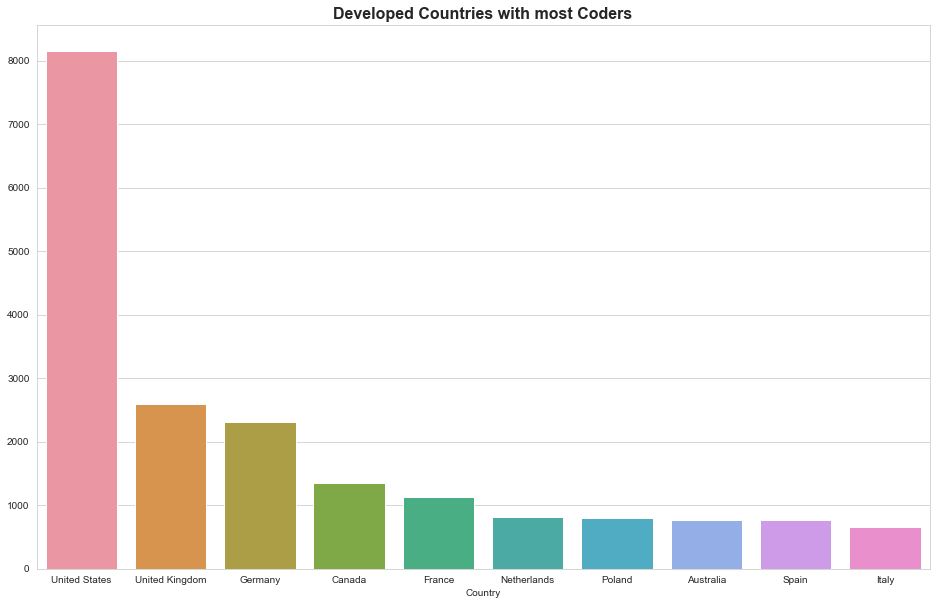

In [22]:
# Graphs of the developed and undeveloped countries with more coders
sns.set_style("whitegrid")
sns.set_palette("Paired", 9)
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Developed Countries with most Coders",fontsize= 16, fontweight='bold' )
ax = sns.barplot(top_dev.index, top_dev.values)

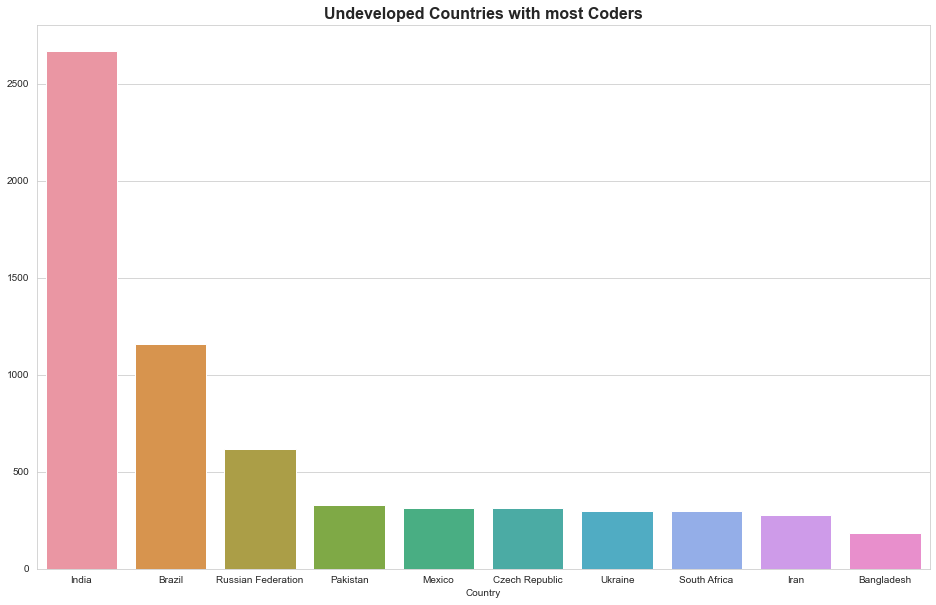

In [23]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Undeveloped Countries with most Coders",fontsize= 16, fontweight='bold' )
ax = sns.barplot(top_und.index, top_und.values)

In [24]:
# Checking the basic statistics for the converted salary for both dataframes
pd.DataFrame(data= [df_dev.ConvertedComp.describe(), df_undev.ConvertedComp.describe()], index=['Developed', 'Undeveloped']).astype(int)

,count,mean,std,min,25%,50%,75%,max
Developed,26022,128243,252609,0,42500,68102,110000,2000000
Undeveloped,8734,30796,87296,0,6981,14660,29251,2000000


In [25]:
#Creating a new column in the salary df to use in the boxplot
df_salary["HDI"] = np.where(df_salary['Country'].isin(list_idh), "developed", 'undeveloped')
df_salary.HDI

7          developed
9          developed
10         developed
11         developed
12         developed
            ...     
64142    undeveloped
64148    undeveloped
64152      developed
64153      developed
64154      developed
Name: HDI, Length: 34756, dtype: object

Text(0, 0.5, 'Salary')

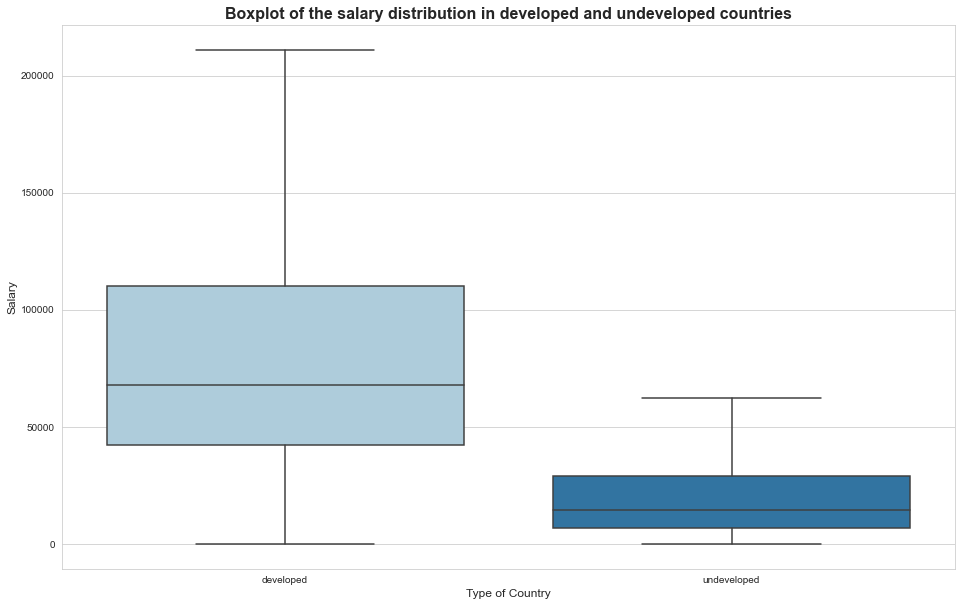

In [26]:
# creating the boxplot
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Boxplot of the salary distribution in developed and undeveloped countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_salary["ConvertedComp"],showfliers = False, x=df_salary.HDI)

ax.set_xlabel("Type of Country",fontsize=12)
ax.set_ylabel("Salary",fontsize=12)

Text(0, 0.5, 'Salary (US$)')

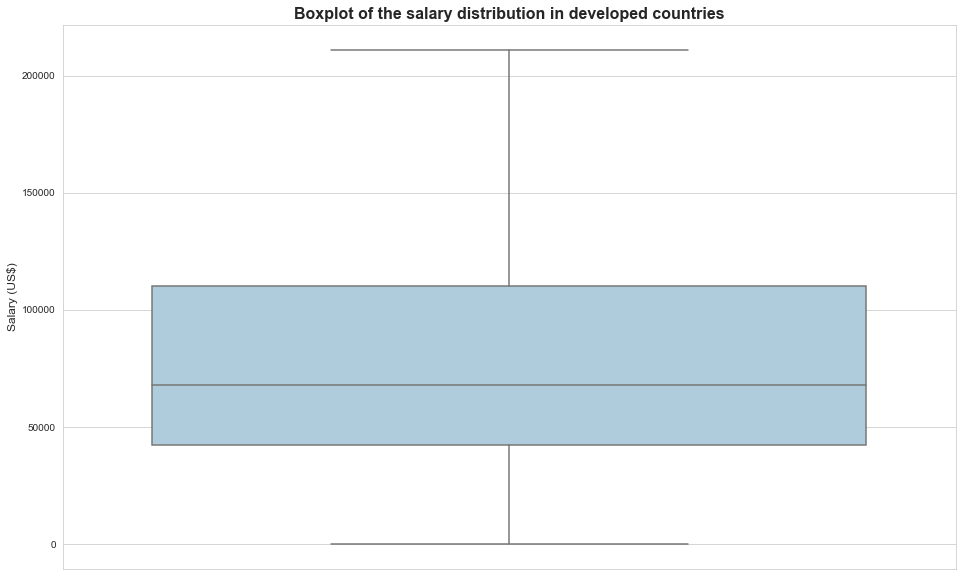

In [27]:
# Analysing the boxplots individually
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Boxplot of the salary distribution in developed countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_dev["ConvertedComp"],showfliers = False)
ax.set_ylabel("Salary (US$)",fontsize=12)

Text(0, 0.5, 'Salary (US$)')

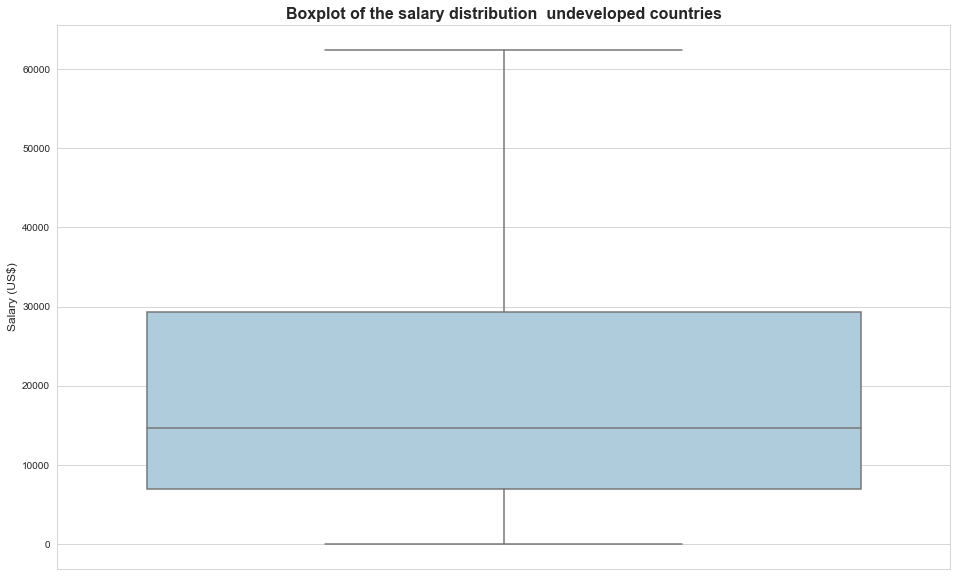

In [28]:
fig = plt.gcf()
fig.set_size_inches( 16, 10)

plt.title("Boxplot of the salary distribution  undeveloped countries",fontsize= 16, fontweight='bold' )
ax = sns.boxplot(y= df_undev["ConvertedComp"],showfliers = False)
ax.set_ylabel("Salary (US$)",fontsize=12)

In [29]:
# Creating a dictionary to rename the education column to fit in the graphs
edu_dict = {'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': "Bachelor's",
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': "Master’s",
       'Some college/university study without earning a degree': "College/university",
       'Secondary school (e.g. American high school, Git_Hub_2020_Survey.ipynberman Realschule or Gymnasium, etc.)' : "Secondary school",
       'Other doctoral degree (Ph.D., Ed.D., etc.)': "Other doctoral",
       'Associate degree (A.A., A.S., etc.)': "Associate degree",
       'Professional degree (JD, MD, etc.)': "Professional degree",
       'Primary/elementary school': 'Primary',
       'I never completed any formal education': "None"}

In [30]:
# Renaming both DFs
df_dev['EdLevel'].replace(edu_dict, inplace=True)
df_undev['EdLevel'].replace(edu_dict, inplace=True)

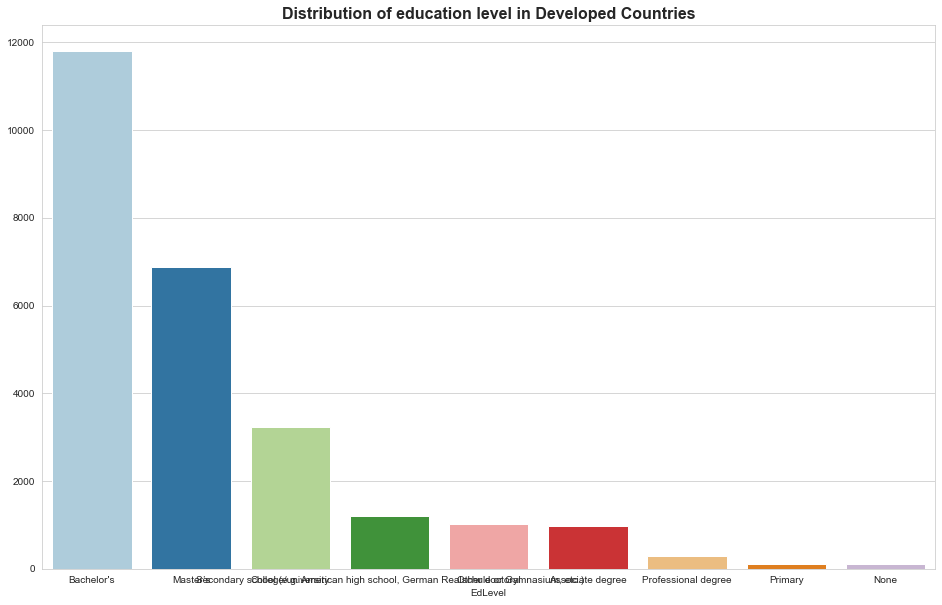

In [31]:
# Creating the Graph of the distribution of education in developed countries
ed_level_dev = df_dev.groupby(by = 'EdLevel').count().sort_values(by = "Respondent", ascending=False).Respondent
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of education level in Developed Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(ed_level_dev.index, ed_level_dev.values)

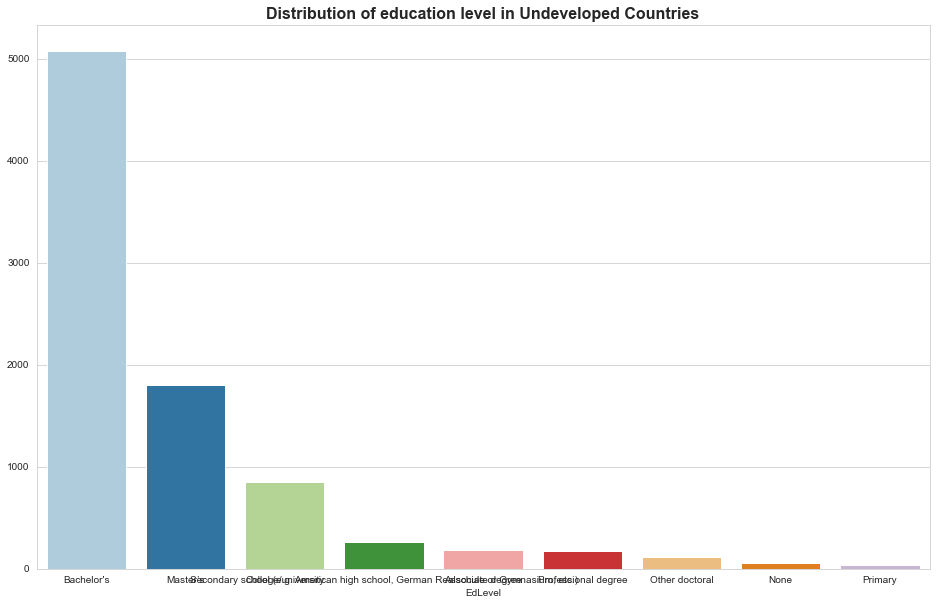

In [32]:
# Creating the Graph of the distribution of education in undeveloped countries
ed_level_und = df_undev.groupby(by = 'EdLevel').count().sort_values(by = "Respondent", ascending=False).Respondent
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of education level in Undeveloped Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(ed_level_und.index, ed_level_und.values)

In [33]:
# Dataframe with the normalized education distribution for both class of countries and the difference between Developed and Undeloveped countries
ed = pd.DataFrame(data= [df_dev.EdLevel.value_counts(normalize=True), df_undev.EdLevel.value_counts(normalize=True)], index=['Developed', 'Undeveloped']).transpose()
ed["Diff"] = ed.Developed - ed.Undeveloped
ed = ed.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
ed

,Developed,Undeveloped,Diff
Bachelor's,0.460398,0.592896,-0.132498
Master’s,0.268045,0.210096,0.057949
College/university,0.126414,0.098855,0.027559
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.046820,0.031082,0.015738
Other doctoral,0.040031,0.013555,0.026477
Associate degree,0.038314,0.021734,0.016580
Professional degree,0.011666,0.020799,-0.009133
Primary,0.004370,0.004791,-0.000421
None,0.003941,0.006193,-0.002252


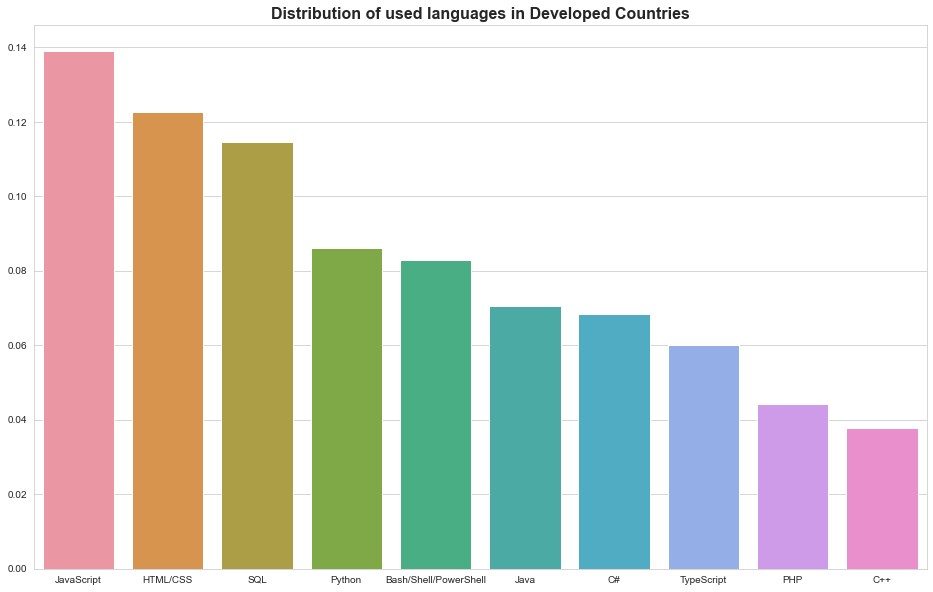

In [34]:
#Using the language extractor to create a graph of the languages used in the developed countries
df_dev = df_dev.dropna(subset= ["LanguageWorkedWith"],axis = 0)
lang_dev = language_extractor(df_dev,"LanguageWorkedWith",';')
x= list(lang_dev)[:10]
top = list(lang_dev.values())[:10]
y = [n / sum(list(lang_dev.values())) for n in top]
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of used languages in Developed Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(x,y)

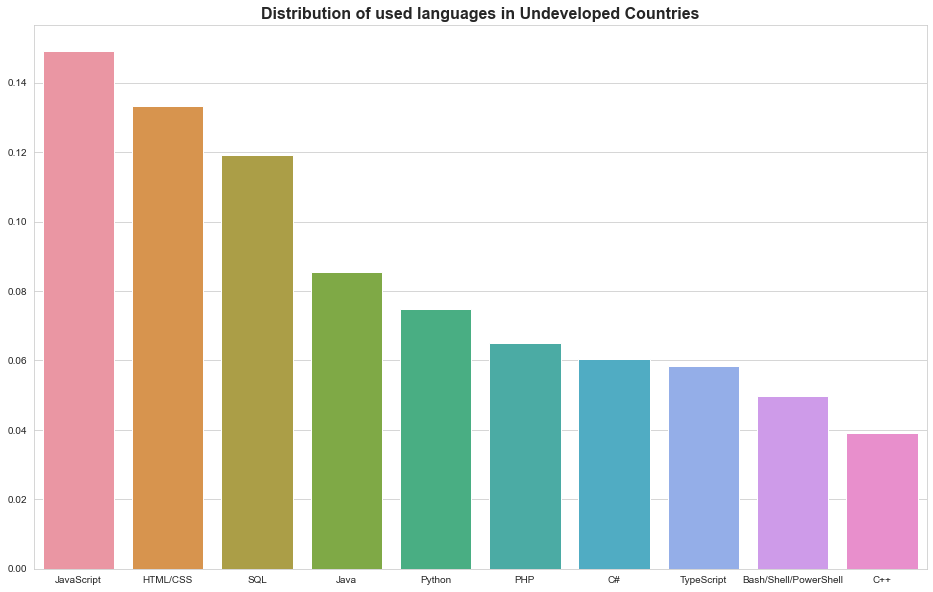

In [35]:
#Using the language extractor to create a graph of the languages used in the undeveloped countries
df_undev = df_undev.dropna(subset= ["LanguageWorkedWith"],axis = 0)
lang_und = language_extractor(df_undev,"LanguageWorkedWith",';')
x= list(lang_und)[:10]
top = list(lang_und.values())[:10]
y = [n / sum(list(lang_und.values())) for n in top]
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Distribution of used languages in Undeveloped Countries",fontsize= 16, fontweight='bold' )
ax = sns.barplot(x,y)

In [36]:
# Dataframe with the normalized language distribution for both class of countries and the difference between Developed and Undeloveped countries
lan = pd.DataFrame(data= [lang_dev,lang_und], index=['Developed', 'Undeveloped']).transpose()
lan.Developed = lan.Developed/ sum(lan.Developed)
lan.Undeveloped = lan.Undeveloped/ sum(lan.Undeveloped)
lan["Diff"] = lan.Developed - lan.Undeveloped
lan = lan.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])
lan

,Developed,Undeveloped,Diff
JavaScript,0.139017,0.149105,-0.010088
HTML/CSS,0.122662,0.133238,-0.010576
SQL,0.114712,0.119279,-0.004567
Python,0.086115,0.074791,0.011324
Bash/Shell/PowerShell,0.082844,0.049660,0.033184
Java,0.070609,0.085361,-0.014752
C#,0.068392,0.060405,0.007987
TypeScript,0.060026,0.058447,0.001579
PHP,0.044308,0.065100,-0.020792
C++,0.037734,0.039140,-0.001406


In [37]:
# Creating classes for years of education 
df_dev['YearsCode'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_dev = df_dev.dropna(subset= ["YearsCode"],axis = 0)
df_dev.YearsCode = df_dev.YearsCode.astype(int)
df_dev.loc[df_dev['YearsCode'] <= 3, 'YearsCode_cod'] = 'max of 3 yrs'
df_dev.loc[(df_dev['YearsCode'] > 3) & (df_dev['YearsCode'] <= 5), 'YearsCode_cod']= 'between 3 and 5 years'
df_dev.loc[(df_dev['YearsCode']  > 5) & (df_dev['YearsCode'] <= 10) , 'YearsCode_cod' ] = 'between 5 and 10 years'
df_dev.loc[(df_dev['YearsCode']  > 10) & (df_dev['YearsCode'] <= 20) , 'YearsCode_cod' ] = 'between 10 and 20 years'
df_dev.loc[df_dev['YearsCode'] > 20, 'YearsCode_cod'] = 'above 20 yrs'



In [38]:
# Checking
df_dev.YearsCode_cod.value_counts().index

Index(['between 10 and 20 years', 'between 5 and 10 years', 'above 20 yrs',
       'between 3 and 5 years', 'max of 3 yrs'],
      dtype='object')

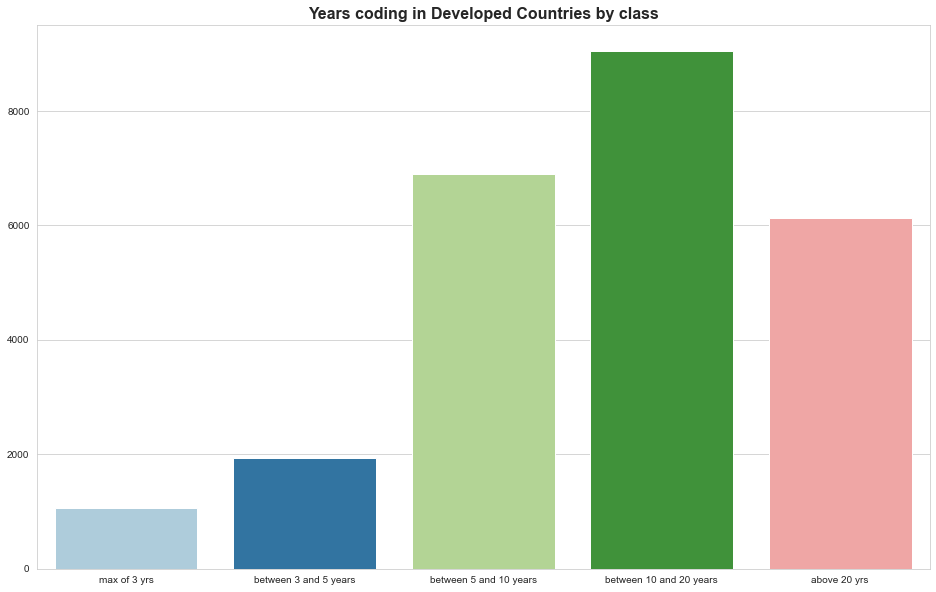

In [39]:
# Plotting
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Years coding in Developed Countries by class",fontsize= 16, fontweight='bold' )
ax = sns.barplot(df_dev.YearsCode_cod.value_counts().index, df_dev.YearsCode_cod.value_counts().values,
                 order = ['max of 3 yrs','between 3 and 5 years',  'between 5 and 10 years','between 10 and 20 years', 'above 20 yrs',
       ])

In [40]:
# Creating classes for years of education 
df_undev['YearsCode'].replace({"More than 50 years": 50, "Less than 1 year": 1}, inplace=True)
df_undev = df_undev.dropna(subset= ["YearsCode"],axis = 0)
df_undev.YearsCode = df_undev.YearsCode.astype(int)
df_undev.loc[df_undev['YearsCode'] <= 3, 'YearsCode_cod'] = 'max of 3 yrs'
df_undev.loc[(df_undev['YearsCode'] > 3) & (df_undev['YearsCode'] <= 5), 'YearsCode_cod']= 'between 3 and 5 years'
df_undev.loc[(df_undev['YearsCode']  > 5) & (df_undev['YearsCode'] <= 10) , 'YearsCode_cod' ] = 'between 5 and 10 years'
df_undev.loc[(df_undev['YearsCode']  > 10) & (df_undev['YearsCode'] <= 20) , 'YearsCode_cod' ] = 'between 10 and 20 years'
df_undev.loc[df_undev['YearsCode'] > 20, 'YearsCode_cod'] = 'above 20 yrs'

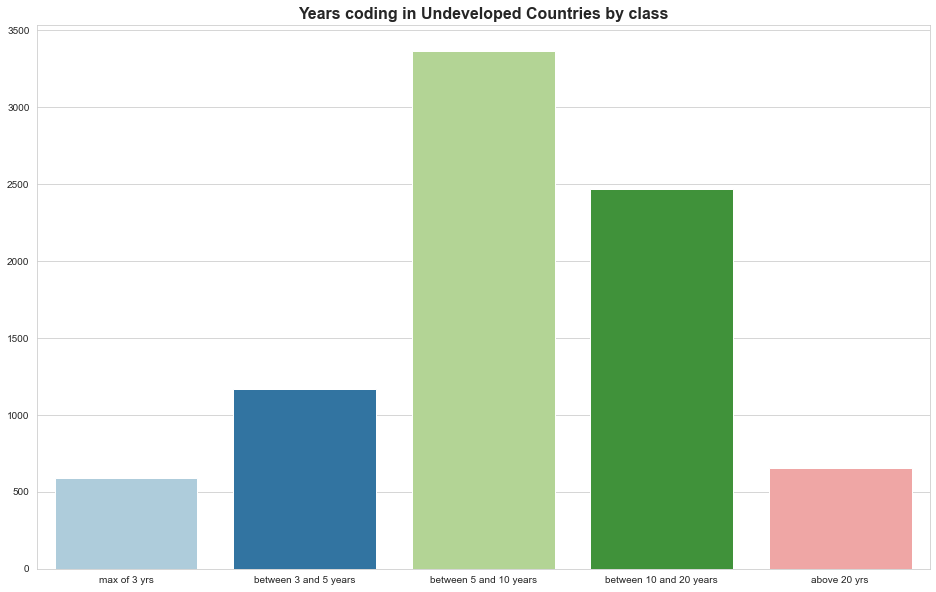

In [41]:
# Plotting
fig = plt.gcf()
fig.set_size_inches( 16, 10)
plt.title("Years coding in Undeveloped Countries by class",fontsize= 16, fontweight='bold' )
ax = sns.barplot(df_undev.YearsCode_cod.value_counts().index, df_undev.YearsCode_cod.value_counts().values,
                 order = ['max of 3 yrs','between 3 and 5 years',  'between 5 and 10 years','between 10 and 20 years', 'above 20 yrs',
       ])

In [42]:
# Dataframe with the normalized overtime worked distribution for both class of countries and the difference between Developed and Undeloveped countries
over = pd.DataFrame(data= [df_dev.NEWOvertime.value_counts(normalize=True), df_undev.NEWOvertime.value_counts(normalize=True)], index=['Developed', 'Undeveloped']).transpose()
over["Diff"] = over.Developed - over.Undeveloped
over = over.reindex(['Never', 'Rarely: 1-2 days per year or less','Occasionally: 1-2 days per quarter but less than monthly',
              'Sometimes: 1-2 days per month but less than weekly', 'Often: 1-2 days per week or more'])
over = over.style.bar(subset=['Diff'], align='mid', color=['#d65f5f', '#5fba7d'])

over

,Developed,Undeveloped,Diff
Never,0.121233,0.074283,0.046950
Rarely: 1-2 days per year or less,0.161497,0.121476,0.040021
Occasionally: 1-2 days per quarter but less than monthly,0.233700,0.195636,0.038064
Sometimes: 1-2 days per month but less than weekly,0.262798,0.287448,-0.024650
Often: 1-2 days per week or more,0.220772,0.321157,-0.100385
